# Práctica 02: Regresión Logística

In [1]:
import numpy as np
from pandas.io.parsers import read_csv
from matplotlib import pyplot as plt
import scipy.optimize as opt
from sklearn.preprocessing import PolynomialFeatures

In [2]:
def load_csv(file_name):
    values = read_csv(file_name,header=None).values
    return values.astype(float)

In [3]:
data = load_csv("data/ex2data1.csv")

In [4]:
X = data[:,:-1] # Features
Y = data[:, -1] # Target
m = np.shape(X)[0] # number of rows

In [5]:
print("#" * 50)
print(data[:5])
print("#" * 50)
X=np.hstack([np.ones([m,1]), X])
print(X[:5])
print("#" * 50)
print(Y[:5])

##################################################
[[34.62365962 78.02469282  0.        ]
 [30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]]
##################################################
[[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]]
##################################################
[0. 0. 0. 1. 1.]


## 1.1 Visualización de Datos

In [6]:
# Obtiene un vector con los índices  de  los  ejemplos  positivos
pos_pass = np.where(Y == 1)
pos_fail = np.where(Y == 0)

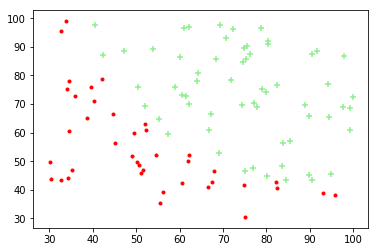

In [7]:
#Dibuja los ejemplos positivos
plt.scatter(X[pos_pass, 1], X[pos_pass, 2], marker ="+", c="lightgreen")
plt.scatter(X[pos_fail, 1], X[pos_fail, 2], marker =".", c="red")

## 1. 2 Función Sigmoide

In [8]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

## 1.3 Cálculo de la función de coste y su gradiente

In [9]:
def cost(thetas, X, Y):
    sigmoid_X_theta = sigmoid(np.matmul(X,thetas))
    
    term_1 = np.matmul(np.transpose(np.log(sigmoid_X_theta)), Y)
    
    term_2 = np.matmul(np.transpose(np.log((1- sigmoid_X_theta))),(1-Y))
    
    return - (term_1 + term_2) / np.shape(X)[0]

In [10]:
def gradient(thetas, X, Y):
    sigmoid_X_theta = sigmoid(np.matmul(X,thetas))
    
    return np.matmul(np.transpose(X),(sigmoid_X_theta - Y)) /  np.shape(X)[0]
    

In [11]:
thetas = np.zeros(np.shape(X)[1])

In [12]:
thetas

array([0., 0., 0.])

In [13]:
cost(thetas, X, Y)

0.6931471805599452

In [14]:
gradient(thetas, X, Y)

array([ -0.1       , -12.00921659, -11.26284221])

## 1.4 Cálculo del valor óptimo de los parámetro

In [15]:
result = opt.fmin_tnc(func=cost, x0= thetas, fprime=gradient, args=(X,Y))
theta_opt = result[0]

In [16]:
cost(theta_opt,X,Y)

0.20349770158947492

In [17]:
def draw_border(X, Y, theta):
    plt.figure()
    x1_min, x1_max = X[:, 1].min(), X[:, 2].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 2].max()
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max),
    np.linspace(x2_min, x2_max))
    h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0], 1)),
    xx1.ravel(),
    xx2.ravel()].dot(theta))
    h = h.reshape(xx1.shape)
    plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')
    plt.scatter(X[pos_pass, 1], X[pos_pass, 2], marker ="+", c="lightgreen")
    plt.scatter(X[pos_fail, 1], X[pos_fail, 2], marker =".", c="red")
    #plt.savefig("frontera.pdf")
    plt.show()
    plt.close()

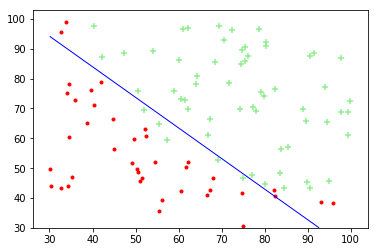

In [18]:
draw_border(X,Y,theta_opt)

## 1.5 Evaluación de la regresión logística

In [19]:
print(sigmoid(np.matmul(np.transpose(theta_opt),X[0])))

0.09103392917859199


In [20]:
X[0]

array([ 1.        , 34.62365962, 78.02469282])

In [21]:
def predict(X, Y, theta_opt):
    Y_pred = []
    correct, incorrect = 0, 0
    for i in range(np.shape(X)[0]):
        Y_pred.append(round(sigmoid(np.matmul(np.transpose(theta_opt),X[i]))))
    return Y_pred 
    

In [22]:
def get_acurracy(Y, Y_pred, m):
    return np.sum((Y == np.array(Y_pred))) / m

In [23]:
print("El porcentaje de acierto del modelo es: {}".format(get_acurracy(Y, predict(X,Y, theta_opt), m)))

El porcentaje de acierto del modelo es: 0.89


## 2.  Regresión logística regularizada

In [24]:
data =load_csv("data/ex2data2.csv")

In [25]:
X = data[:,:-1] # Features
Y = data[:, -1] # Target
m = np.shape(X)[0] # number of rows

In [26]:
print("#" * 50)
print(data[:5])
print("#" * 50)
print(X[:5])
print("#" * 50)
print(Y[:5])

##################################################
[[ 0.051267  0.69956   1.      ]
 [-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]]
##################################################
[[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
##################################################
[1. 1. 1. 1. 1.]


In [27]:
# Obtiene un vector con los índices  de  los  ejemplos  positivos
pos_pass = np.where(Y == 1)
pos_fail = np.where(Y == 0)

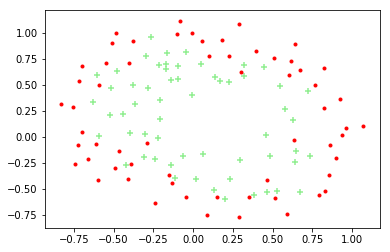

In [28]:
#Dibuja los ejemplos positivos
plt.scatter(X[pos_pass, 0], X[pos_pass, 1], marker ="+", c="lightgreen")
plt.scatter(X[pos_fail, 0], X[pos_fail, 1], marker =".", c="red")

## 2.1 Mapeo de los atributos

In [29]:
poly = PolynomialFeatures(degree=6)

In [30]:
X_poly = poly.fit_transform(X)
X=np.hstack([np.ones([m,1]), X])
X_poly

array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01, ...,
         6.29470940e-04,  8.58939846e-03,  1.17205992e-01],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01, ...,
         1.89305413e-03, -1.39810280e-02,  1.03255971e-01],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01, ...,
         1.04882142e-02, -3.39734512e-02,  1.10046893e-01],
       ...,
       [ 1.00000000e+00, -4.84450000e-01,  9.99270000e-01, ...,
         2.34007252e-01, -4.82684337e-01,  9.95627986e-01],
       [ 1.00000000e+00, -6.33640000e-03,  9.99270000e-01, ...,
         4.00328554e-05, -6.31330588e-03,  9.95627986e-01],
       [ 1.00000000e+00,  6.32650000e-01, -3.06120000e-02, ...,
         3.51474517e-07, -1.70067777e-08,  8.22905998e-10]])

In [31]:
X_poly.shape

(118, 28)

## 2.2 Cálculo de la función de coste y su gradiente

In [32]:
def cost_regularization(thetas, X, Y, Lambda):
    sigmoid_X_theta = sigmoid(np.matmul(X,thetas))
    
    term_1_1 = np.matmul(np.transpose(np.log(sigmoid_X_theta)), Y)
    
    term_1_2 = np.matmul(np.transpose(np.log((1- sigmoid_X_theta))),(1-Y))
    
    term_1 = - (term_1_1 + term_1_2) / np.shape(X)[0]
    term_2 = Lambda/(2*m) * sum(thetas **2)
    
    return term_1 + term_2

In [33]:
def gradient_reguarization(thetas, X, Y, Lambda):
    sigmoid_X_theta = sigmoid(np.matmul(X,thetas))
    
    term_1 = np.matmul(np.transpose(X),(sigmoid_X_theta - Y)) /  np.shape(X)[0]
    term_2 = (Lambda/m) * thetas
    
    return term_1 + term_2

In [34]:
thetas = np.zeros(np.shape(X_poly)[1])

In [35]:
cost_regularization(thetas, X_poly, Y, 1)

0.6931471805599453

## 2.3 Cálculo del valor óptimo de los parámetros

In [36]:
result = opt.fmin_tnc(func=cost_regularization, x0= thetas, fprime=gradient_reguarization, args=(X_poly,Y,1))
theta_opt = result[0]

In [37]:
theta_opt

array([ 1.14201563,  0.60123714,  1.16715815, -1.87180901, -0.91567129,
       -1.26944019,  0.12678672, -0.36850107, -0.34494254, -0.17391074,
       -1.42370671, -0.04838579, -0.60631733, -0.26916589, -1.16320193,
       -0.24269708, -0.20697486, -0.04305269, -0.28008547, -0.2870893 ,
       -0.46912456, -1.03629765,  0.02904381, -0.2925073 ,  0.01716378,
       -0.32880517, -0.13795624, -0.93187567])

In [38]:
def plot_decisionboundary(X, Y, theta, poly):
    
    plt.figure()
    pos_pass = np.where(Y == 1)
    pos_fail = np.where(Y == 0)

    x1_min,x1_max=X[:,1].min(),X[:,1].max()
    x2_min,x2_max=X[:,2].min(),X[:,2].max()
    xx1, xx2 = np.meshgrid(np.linspace(x1_min,x1_max),
                          np.linspace(x2_min,x2_max))
    h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(theta))

    h = h.reshape(xx1.shape)    
    
    plt.scatter(X[pos_pass, 1], X[pos_pass, 2], marker ="+", c="lightgreen")
    plt.scatter(X[pos_fail, 1], X[pos_fail, 2], marker =".", c="red")

    plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='g')
    plt.show()
    plt.close()
    

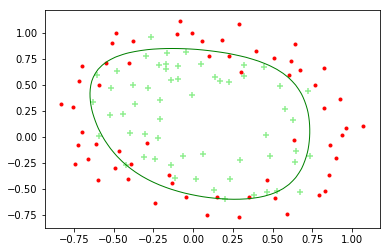

In [39]:
plot_decisionboundary(X_poly,Y,theta_opt,poly)

In [40]:
print("El porcentaje de acierto del modelo es: {}".format(get_acurracy(Y, predict(X_poly, Y,theta_opt), m)*100) + "%")

El porcentaje de acierto del modelo es: 81.35593220338984%


## 2.4.  Efectos de la regularización

In [41]:
def regularization_effects(X_poly, Y):
    accuracy_array = []
    for i in range(100):
        theta_opt = opt.fmin_tnc(func=cost_regularization, x0= thetas, fprime=gradient_reguarization, args=(X_poly,Y,i/10))[0]
        accuracy_array.append(get_acurracy(Y, predict(X_poly, Y,theta_opt), m)*100)
        
    plt.xlabel("Lambda value")
    plt.ylabel("Accuracy")
    plt.plot(np.linspace(1,10,100),accuracy_array)

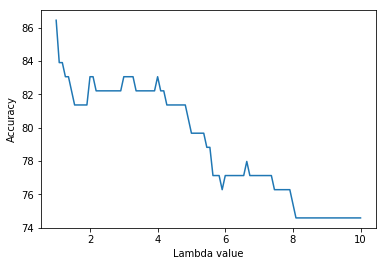

In [42]:
regularization_effects(X_poly,Y)